In [4]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import seaborn as sns
import matplotlib.pyplot as plt

import pickle

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

df = pd.read_csv("get_around_pricing_project.csv")

# Conversione des colonne booleane en numerique
bool_cols = ['private_parking_available', 'has_gps', 'has_air_conditioning', 'automatic_car', 'has_getaround_connect', 'has_speed_regulator', 'winter_tires']
for col in bool_cols:
    df[col] = df[col].astype(int)

# Features et target
X = df[['mileage', 'engine_power', 'private_parking_available', 'has_gps', 'has_air_conditioning', 'automatic_car', 'has_getaround_connect', 'has_speed_regulator', 'winter_tires']]
y = df['rental_price_per_day']

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling des features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creation et entrainement du model XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Prediction
y_pred_train = xgb_model.predict(X_train_scaled)
y_pred_test = xgb_model.predict(X_test_scaled)

print("R² sul set di addestramento:", r2_score(y_train, y_pred_train))
print("R² sul set di test:", r2_score(y_test, y_pred_test))

# Évaluation du modèle
y_pred = xgb_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Erreur absolue moyenne (MAE): {mae:.2f} €")
print(f"Erreur quadratique moyenne (RMSE): {rmse:.2f} €")

# Sauvegarde du modèle et du scaler
with open('modele_prix.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Modèle et scaler sauvegardés avec succès!")


R² sul set di addestramento: 0.7256996205863784
R² sul set di test: 0.6896071366420938
Erreur absolue moyenne (MAE): 12.48 €
Erreur quadratique moyenne (RMSE): 18.08 €
Modèle et scaler sauvegardés avec succès!


In [6]:
# Évaluation du modèle
y_pred = xgb_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)

print(f"Erreur absolue moyenne (MAE): {mae:.2f} €")
print(f"Erreur quadratique moyenne (RMSE): {rmse:.2f} €")
print(f"R²: {r2:.4f}")

Erreur absolue moyenne (MAE): 12.48 €
Erreur quadratique moyenne (RMSE): 18.08 €
R²: 0.6896


In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

# Caricamento e preparazione dei dati
df = pd.read_csv("get_around_pricing_project.csv")
bool_cols = ['private_parking_available', 'has_gps', 'has_air_conditioning', 'automatic_car', 'has_getaround_connect', 'has_speed_regulator', 'winter_tires']
for col in bool_cols:
    df[col] = df[col].astype(int)

X = df[['mileage', 'engine_power', 'private_parking_available', 'has_gps', 'has_air_conditioning', 'automatic_car', 'has_getaround_connect', 'has_speed_regulator', 'winter_tires']]
y = df['rental_price_per_day']

# Divisione in set di training e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling delle features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definizione della griglia di iperparametri
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.2],
    'reg_lambda': [1, 1.1, 1.2]
}

# Creazione del modello XGBoost
xgb_model = XGBRegressor(random_state=42)

# Ricerca degli iperparametri con cross-validation
grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           scoring='r2',
                           cv=3,  # Aumentato a 3 per una stima più robusta
                           verbose=1,
                           n_jobs=-1)  # Usa tutti i core del processore

# Esecuzione della ricerca
grid_search.fit(X_train_scaled, y_train)

# Migliori iperparametri
print("Migliori iperparametri:", grid_search.best_params_)

# Miglior modello
best_xgb_model = grid_search.best_estimator_

# Valutazione del modello sul set di test
r2_test = best_xgb_model.score(X_test_scaled, y_test)
print("R² sul set di test:", r2_test)

Fitting 3 folds for each of 6561 candidates, totalling 19683 fits
Migliori iperparametri: {'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 0.8}
R² sul set di test: 0.6842004999387941


In [2]:
df = pd.read_csv(r"C:\Users\pietr\OneDrive\Desktop\FullStack\GetAround\get_around_pricing_project.csv", encoding="utf_8")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import r2_score


# Caricamento e preparazione dei dati
df = pd.read_csv("get_around_pricing_project.csv")

# Conversione delle colonne booleane in numeriche
bool_cols = ['private_parking_available', 'has_gps', 'has_air_conditioning', 'automatic_car', 'has_getaround_connect', 'has_speed_regulator', 'winter_tires']
for col in bool_cols:
    df[col] = df[col].astype(int)

# Definizione delle features e del target
X = df[['mileage', 'engine_power', 'private_parking_available', 'has_gps', 'has_air_conditioning', 'automatic_car', 'has_getaround_connect', 'has_speed_regulator', 'winter_tires']]
y = df['rental_price_per_day']

# Divisione in set di training e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling delle features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Creazione e addestramento del modello XGBoost
xgb_model = XGBRegressor(colsample_bytree=0.7, gamma=0.1, n_estimators=100, learning_rate=0.05, max_depth=5, reg_alpha=0.1, subsample=0.8, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Valutazione del modello
y_pred_train = xgb_model.predict(X_train_scaled)
y_pred_test = xgb_model.predict(X_test_scaled)

print("R² sul set di addestramento:", r2_score(y_train, y_pred_train))
print("R² sul set di test:", r2_score(y_test, y_pred_test))

R² sul set di addestramento: 0.7594854632192553
R² sul set di test: 0.6842004999387941


In [3]:
# Évaluation du modèle
y_pred = xgb_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Erreur absolue moyenne (MAE): {mae:.2f} €")
print(f"Erreur quadratique moyenne (RMSE): {rmse:.2f} €")
print(f"R²: {r2:.4f}")

Erreur absolue moyenne (MAE): 12.42 €
Erreur quadratique moyenne (RMSE): 18.24 €
R²: 0.6842


In [3]:
df.head()

,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


In [4]:
# Moyen de prix pour chaque model 
prix_moyen_model = df.groupby('model_key')['rental_price_per_day'].mean()

print(prix_moyen_model)

model_key
Alfa Romeo     157.666667
Audi           130.538023
BMW            117.432890
Citroën        108.764706
Ferrari        150.515152
Fiat            93.000000
Ford           111.000000
Honda          145.000000
KIA Motors     159.000000
Lamborghini    157.500000
Lexus          193.000000
Maserati       188.666667
Mazda           67.000000
Mercedes       121.360825
Mini           204.000000
Mitsubishi     170.675325
Nissan         111.130909
Opel           155.575758
PGO            126.090909
Peugeot        104.917445
Porsche        144.666667
Renault        120.609170
SEAT           181.239130
Subaru         182.340909
Suzuki         223.875000
Toyota         149.792453
Volkswagen     134.123077
Yamaha         133.000000
Name: rental_price_per_day, dtype: float64


In [5]:
df.columns

Index(['Unnamed: 0', 'model_key', 'mileage', 'engine_power', 'fuel',
       'paint_color', 'car_type', 'private_parking_available', 'has_gps',
       'has_air_conditioning', 'automatic_car', 'has_getaround_connect',
       'has_speed_regulator', 'winter_tires', 'rental_price_per_day'],
      dtype='object')

In [6]:
df["fuel"].value_counts()

fuel
diesel           4641
petrol            191
hybrid_petrol       8
electro             3
Name: count, dtype: int64

In [7]:
df["model_key"].value_counts()

model_key
Citroën        969
Renault        916
BMW            827
Peugeot        642
Audi           526
Nissan         275
Mitsubishi     231
Mercedes        97
Volkswagen      65
Toyota          53
SEAT            46
Subaru          44
Opel            33
Ferrari         33
PGO             33
Maserati        18
Suzuki           8
Porsche          6
Ford             5
KIA Motors       3
Alfa Romeo       3
Fiat             2
Lexus            2
Lamborghini      2
Mini             1
Mazda            1
Honda            1
Yamaha           1
Name: count, dtype: int64

In [8]:
df.isna().sum()

Unnamed: 0                   0
model_key                    0
mileage                      0
engine_power                 0
fuel                         0
paint_color                  0
car_type                     0
private_parking_available    0
has_gps                      0
has_air_conditioning         0
automatic_car                0
has_getaround_connect        0
has_speed_regulator          0
winter_tires                 0
rental_price_per_day         0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 4843 non-null   int64 
 1   model_key                  4843 non-null   object
 2   mileage                    4843 non-null   int64 
 3   engine_power               4843 non-null   int64 
 4   fuel                       4843 non-null   object
 5   paint_color                4843 non-null   object
 6   car_type                   4843 non-null   object
 7   private_parking_available  4843 non-null   bool  
 8   has_gps                    4843 non-null   bool  
 9   has_air_conditioning       4843 non-null   bool  
 10  automatic_car              4843 non-null   bool  
 11  has_getaround_connect      4843 non-null   bool  
 12  has_speed_regulator        4843 non-null   bool  
 13  winter_tires               4843 non-null   bool  
 14  rental_p

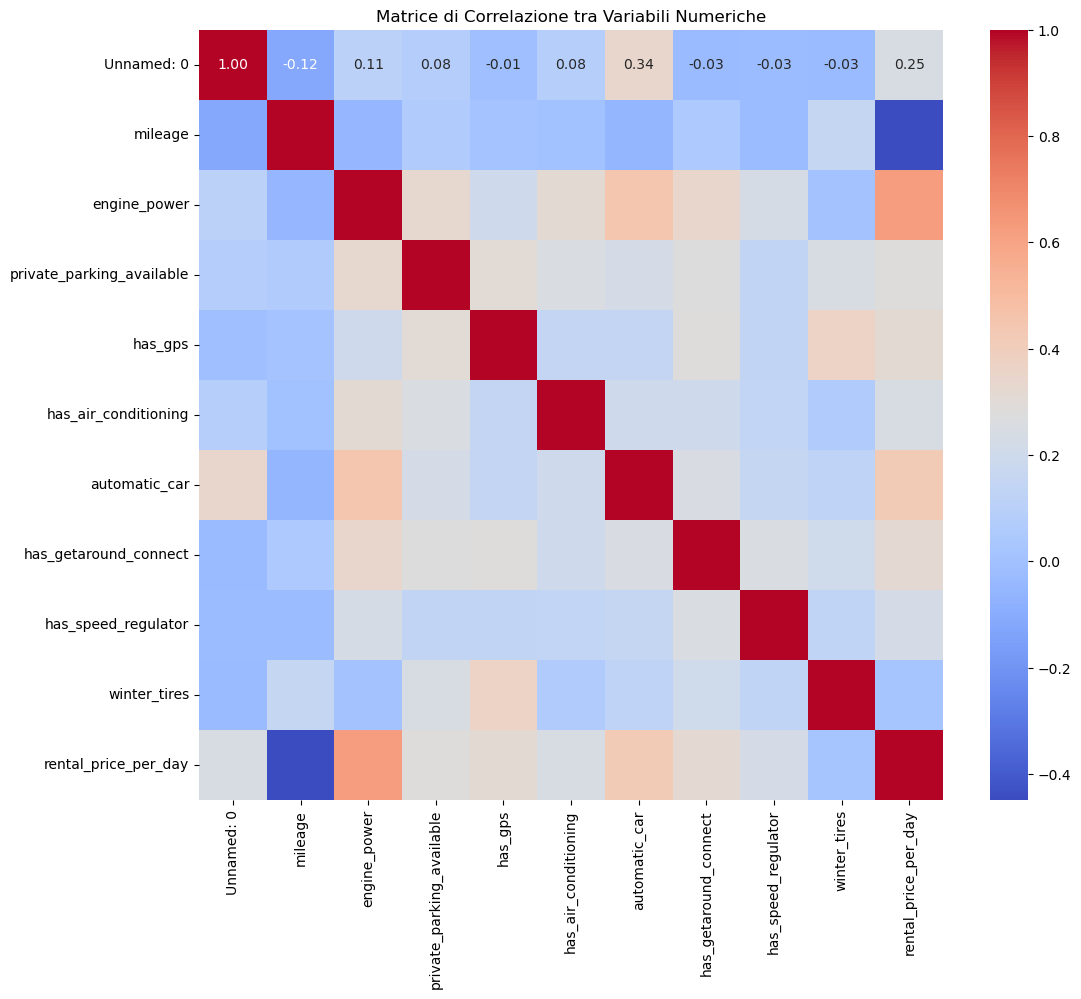

In [ ]:
"""# Converti le colonne booleane in numeriche (0 e 1)
bool_cols = ['private_parking_available', 'has_gps', 'has_air_conditioning', 'automatic_car', 'has_getaround_connect', 'has_speed_regulator', 'winter_tires']
for col in bool_cols:
    df[col] = df[col].astype(int)

# Converti al tipo di dati numerico, gestendo gli errori
df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')
df['engine_power'] = pd.to_numeric(df['engine_power'], errors='coerce')
df['rental_price_per_day'] = pd.to_numeric(df['rental_price_per_day'], errors='coerce')

# Gestisci i valori mancanti
df.dropna(inplace=True)  # Rimuovi le righe con valori mancanti

# Seleziona solo le colonne numeriche
df_numeric = df.select_dtypes(include=['number'])

# Calcola la matrice di correlazione
correlation_matrix = df_numeric.corr()

# Visualizza la matrice di correlazione
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice di Correlazione tra Variabili Numeriche")
plt.show()"""

In [10]:
# Préparation des données
# Conversion des variables catégorielles
#donnees_prep = pd.get_dummies(df, columns=['model_key', 'fuel', 'paint_color', 'car_type'])

# Sélection des caractéristiques
caracteristiques = ['mileage', 'engine_power', 'private_parking_available', 
                   'has_gps', 'has_air_conditioning', 'automatic_car', 
                   'has_getaround_connect', 'has_speed_regulator', 'winter_tires']
# Ajout des colonnes one-hot encodées
"""for col in donnees_prep.columns:
    if col.startswith('model_key_') or col.startswith('fuel_') or col.startswith('paint_color_') or col.startswith('car_type_'):
        caracteristiques.append(col)

# Définition des variables X et y
X = donnees_prep[caracteristiques]
y = donnees_prep['rental_price_per_day']"""

# Définition des variables X et y
X = df[caracteristiques]
y = df['rental_price_per_day']

In [11]:
# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
# Entraînement du modèle
print("Entraînement du modèle...")
modele = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=25,max_features=5, random_state=42)
modele.fit(X_train_scaled, y_train)

Entraînement du modèle...


RandomForestRegressor(max_depth=20, max_features=5, min_samples_split=25,
                      random_state=42)

In [53]:
# Évaluation du modèle
y_pred = modele.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Erreur absolue moyenne (MAE): {mae:.2f} €")
print(f"Erreur quadratique moyenne (RMSE): {rmse:.2f} €")
print(f"R²: {r2:.4f}")

Erreur absolue moyenne (MAE): 12.49 €
Erreur quadratique moyenne (RMSE): 18.33 €
R²: 0.6809


In [54]:
r2_score(y_test, y_pred)

0.6808695167259641

In [55]:
# 5. Calcolo dell'R² sui set di addestramento e test
y_train_pred = modele.predict(X_train_scaled)  # predizioni sul set di addestramento
y_test_pred = modele.predict(X_test_scaled)   # predizioni sul set di test

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R² sul set di addestramento: {r2_train:.4f}")
print(f"R² sul set di test: {r2_test:.4f}")

R² sul set di addestramento: 0.7788
R² sul set di test: 0.6809


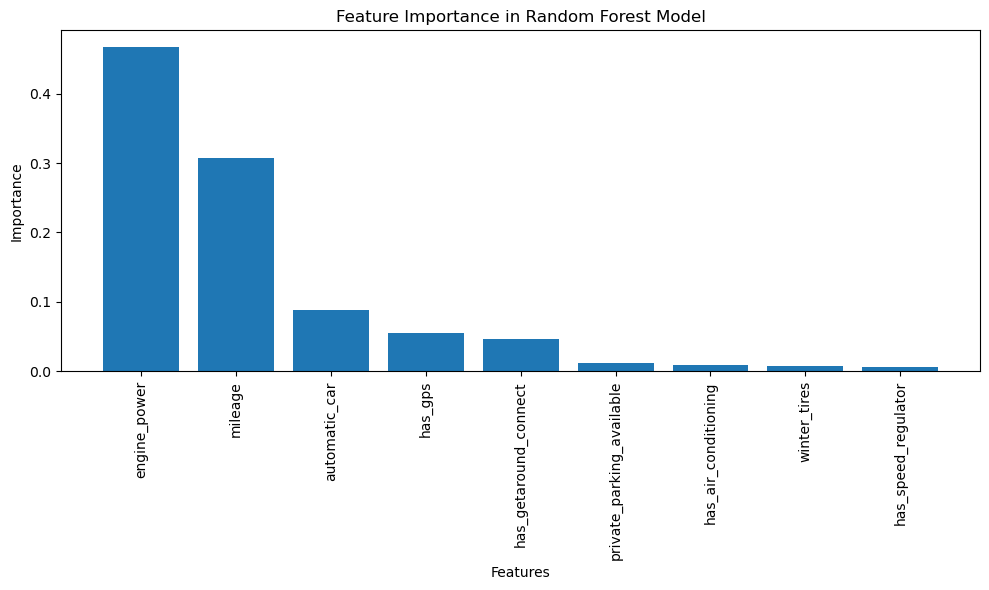

                     feature  importance
1               engine_power    0.467764
0                    mileage    0.307475
5              automatic_car    0.088627
3                    has_gps    0.055006
6      has_getaround_connect    0.046167
2  private_parking_available    0.011419
4       has_air_conditioning    0.009536
8               winter_tires    0.008270
7        has_speed_regulator    0.005735


In [23]:
# Assumendo che il tuo modello si chiami 'model' e X contenga i nomi delle features
feature_importance = modele.feature_importances_
feature_names = X.columns

# Crea un DataFrame con le importanze delle features
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})

# Ordina il DataFrame per importanza decrescente
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Visualizza le importanze delle features
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest Model')
plt.tight_layout()
plt.show()

# Stampa le importanze delle features
print(feature_importance_df)